Data types: 
transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

Top 10
   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  20-02-2014                 1              1    5   
2     18505840838   271509  16-12-2013                 1              1    3   
3     92814475704   267750  16-08-2013                 1              1   -4   
4     92814475704   267750    7/8/2013                 1              1    4   
5      4737317330   269345  29-07-2011                 1         

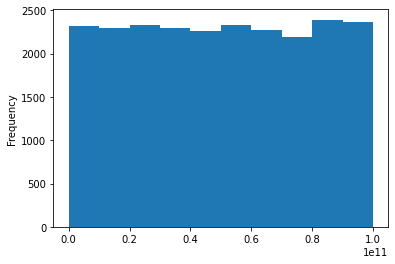

cust_id


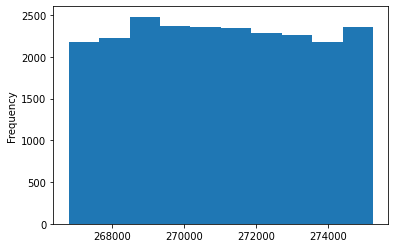

prod_subcat_code


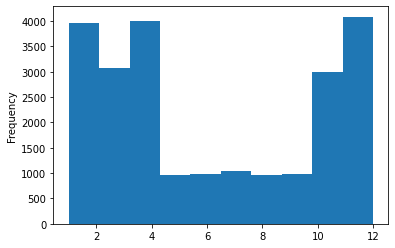

prod_cat_code


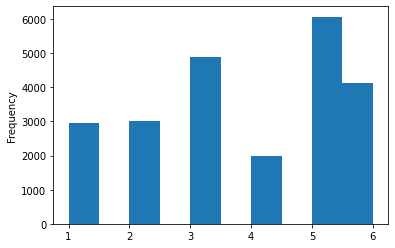

Qty


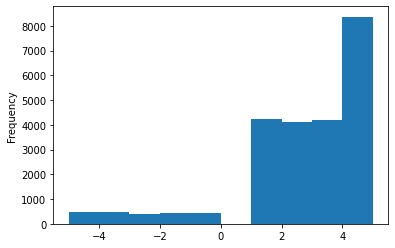

Rate


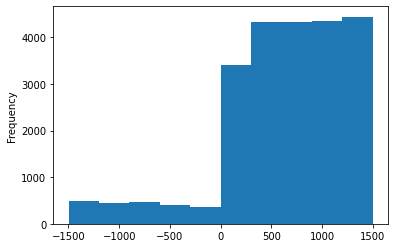

Tax


KeyboardInterrupt: 

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Customer=pd.read_csv("/Users/nitink/Downloads/Case Study/Python foundation Case Study 1/Customer.csv")
prod=pd.read_csv("/Users/nitink/Downloads/Case Study/Python foundation Case Study 1/prod_cat_info.csv")
trans=pd.read_csv("/Users/nitink/Downloads/Case Study/Python foundation Case Study 1/Transactions.csv")

Customer.columns = ['cust_id', 'DOB', 'Gender', 'city_code']
prod.columns = ['prod_cat_code', 'prod_cat', 'prod_subcat_code', 'prod_subcat']

##1. 
temp_join = trans.merge(Customer,on='cust_id')
Customer_Final = temp_join.merge(prod,on=['prod_cat_code','prod_subcat_code'])
#Customer_Final.head()


##2.
k = pd.DataFrame(Customer_Final.dtypes).reset_index()
categorical= list(k[k[0]=='object']['index'])
numerical = list(k[k[0]!='object']['index'])

print('Data types: ')
print(Customer_Final.dtypes)
print()
print("Top 10")
print(Customer_Final.head(10))
print()
print('Tail 10')
print(Customer_Final.tail(10))
print()
print('Summary of int datatypes')
for i in numerical:
    print(i)
    print('Min:',min(Customer_Final[i]),end=', ')
    print('Q1:',np.percentile(Customer_Final[i],25),end=', ')
    print('median:',np.median(Customer_Final[i]),end=', ')
    print('Q3:',np.percentile(Customer_Final[i],75),end=', ')
    print('Max:',max(Customer_Final[i]),end=', ')
    print()

print()
for i in categorical:
    print(Customer_Final[i].value_counts())
print()

##3. 
for i in numerical:
    print(i)
    Customer_Final[i].plot(kind='hist')
    plt.show()

for i in categorical:
    print(i)
    Customer_Final[i].value_counts().plot(kind='bar')
    plt.show()

##4.
Customer_Final['tran_date']= pd.to_datetime(Customer_Final['tran_date'])
print('Time period of trans:',min(Customer_Final['tran_date']),max(Customer_Final['tran_date']))

print('Transactions total amt in negative:',Customer_Final[Customer_Final['total_amt']<0].shape[0])

##5.
print('Product brought by males:')
print(Customer_Final[Customer_Final['Gender']=='M']['prod_cat'].value_counts())
print('Popular in Male:',Customer_Final[Customer_Final['Gender']=='M']['prod_cat'].value_counts().reset_index().iloc[0])

print('Product brought by females:')
print(Customer_Final[Customer_Final['Gender']=='F']['prod_cat'].value_counts())
print('Popular in Female:',Customer_Final[Customer_Final['Gender']=='F']['prod_cat'].value_counts().reset_index().iloc[0])

##6.
print('City code with maximum count:',Customer_Final['city_code'].value_counts().reset_index().iloc[0])
print('Percentage',round(((Customer_Final['city_code'].value_counts().reset_index()['city_code'][0])/Customer_Final['city_code'].shape[0])*100,2))

##7.
print('Store type with maximum quantity:',Customer_Final['Store_type'].value_counts().reset_index().iloc[0])
print('Store type with maximum sale:',Customer_Final.groupby(['Store_type'])['total_amt'].sum().reset_index().iloc[0])

##8.
k = Customer_Final.groupby(['Store_type','prod_cat'])['total_amt'].sum().reset_index()
print(k[(k['Store_type']=='Flagship store')&((k['prod_cat']=='Electronics')|(k['prod_cat']=='Clothing'))])

##9.
k = Customer_Final.groupby(['Gender','prod_cat'])['total_amt'].sum().reset_index()
print('Total amount earned from "Male" customers under the "Electronics" category',k[(k['Gender']=='M')&((k['prod_cat']=='Electronics'))]['total_amt'].iloc[0])

##10.
k = Customer_Final[Customer_Final['total_amt']>0]
k2 = k.groupby(['cust_id'])['transaction_id'].count().reset_index()
print('customers have more than 10 unique transactions, after removing all transactions which have any negative amounts',k2[k2['transaction_id']>10].shape[0])

##11.
Customer_Final['DOB']= pd.to_datetime(Customer_Final['DOB'])
now = pd.datetime.now()
Customer_Final['age'] = (now - Customer_Final['DOB']).astype('<m8[Y]') 
k = Customer_Final[(Customer_Final['age']>25) & (Customer_Final['age']<35)]
k2 = k.groupby(['prod_cat'])['total_amt'].sum().reset_index()
print('the total amount spent for “Electronics” and “Books” product categories:',k2[k2['prod_cat']=='Electronics']['total_amt'].iloc[0]+k2[k2['prod_cat']=='Books']['total_amt'].iloc[0])